In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

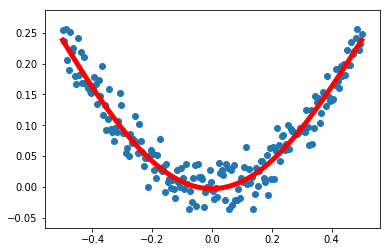

In [10]:
#using numpy to create 200 random dot
x_data = np.linspace(-0.5, 0.5, 200)[:, np.newaxis]
noise = np.random.normal(0, 0.02, x_data.shape)
y_data = np.square(x_data) + noise

#define two placeholder
x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

#define Neural Network Intermediate Layer
Weights_L1 = tf.Variable(tf.random.normal([1, 10]))
biases_L1 = tf.Variable(tf.zeros([1, 10]))
Wx_plus_b_L1 = tf.matmul(x, Weights_L1) + biases_L1
L1 = tf.nn.tanh(Wx_plus_b_L1)

#define output layer
Weights_L2 = tf.Variable(tf.random.normal([10, 1]))
biases_L2 = tf.Variable(tf.zeros([1, 1]))
Wx_plus_b_L2 = tf.matmul(L1, Weights_L2) + biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)

#define Quadratic cost function
loss = tf.reduce_mean(tf.square(y_data - prediction))

#define a gradient descent method as as a training optimizer
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    #Variable output
    sess.run(tf.global_variables_initializer())
    for _ in range(20000):
        sess.run(train_step, feed_dict={x:x_data, y:y_data})
        
    #get the predicted value
    prediction_value = sess.run(prediction, feed_dict={x:x_data})
    #paint a picture
    plt.figure()
    plt.scatter(x_data, y_data)
    plt.plot(x_data, prediction_value, 'r-', lw = 5)
    plt.show()